#### DTMF signal of my number
$$
    x[n] = \sin(2\pi\,(f_l/F_s)\, n) + \sin(2\pi\,(f_h/F_s)\,n)
$$

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy.io.wavfile as wavfile
import scipy.io
from scipy import signal
import matplotlib.colors as colors
import os
import IPython

In [2]:
numbers = [(941, 1336), (852, 1477), (697, 1209), (697, 1336), (770, 1209), (697, 1477), (697, 1336), (770, 1209), (697, 1209)]

In [3]:
silent = 0.5
FS = 24000

In [4]:
n = np.arange(0, int(0.5 * FS))
x = np.array([])
samples = np.array([])
for num in numbers:
    F_L, F_H = num
    samples = np.sin(2*np.pi *(F_L / FS)* n) + np.sin(2*np.pi * (F_H / FS) * n)
    samples_with_silent = np.append(samples, np.zeros(int(silent * FS)))
    x = np.append(x, samples_with_silent)

In [5]:
IPython.display.Audio(x, rate=FS)

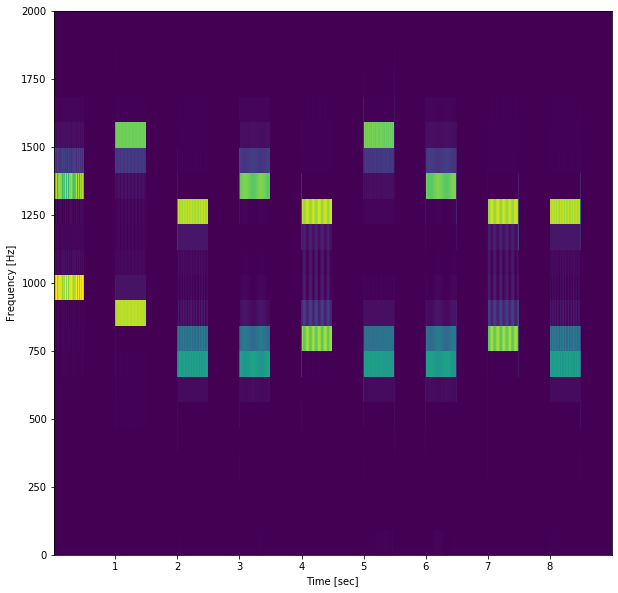

In [6]:
f, t, Sxx = signal.spectrogram(x, FS)
plt.figure(figsize=(10, 10))
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim(ymax = 2000, ymin = 0)
plt.show()

In [24]:
def write_audio(path, sr, data):
	data = data.astype('int16')
	wavfile.write(path, sr, data)
	return None

In [25]:
write_audio('Mynumber.wav', FS, x)

In [35]:
def get_spcgr(audio_path, cmapval, start=0, duration=5):
	# extracts audio data, then saves spectrogram of duration sec
	fs, mix_data = wavfile.read(audio_path)
	audio_dir = os.path.dirname(audio_path)
	audio_name = os.path.basename(audio_path).split('.') [0]
	frlen = int(short_time * fs / 1000) # frame length with duration short_time ms 
	ovlap = int(frlen / 2) # overlap of adjacent frames
	f, t, Sxx = signal.spectrogram(mix_data[start*fs:(start+duration)*fs], fs=fs, window='hamming', nperseg=frlen, noverlap=ovlap)
	fig = plt.figure()
	fig.canvas.set_window_title(audio_name)
	#plt.pcolormesh(t, f, Sxx, cmap=cmapval, norm=colors.PowerNorm(gamma=1./3.), edgecolors='None', shading='gouraud') # cmap = 'inferno', 'bwr', 'binary', 'Greys', 'OrRd', 'jet', 'Blues', 'afmhot', 'RdYlBu', 'PuBu', 'PuBu_r'
	plt.pcolormesh(t, f, Sxx, cmap=cmapval, norm=colors.LogNorm(vmin=1, vmax=Sxx.max()), edgecolors='None', shading='gouraud')
	plt.ylabel('Frequency [Hz]')
	plt.xlabel('Time [sec]')
	fig.set_size_inches(size_pixel_y / dpi_value, size_pixel_x / dpi_value)
	fig.savefig(os.path.join(audio_dir, audio_name + '.png'), dpi = dpi_value)
	plt.show()

In [36]:
short_time = 32 #miliseconds
start_t = 0 # start time in seconds
dur = 9 # duration in seconds
color_theme = 'hot' # inferno, gnuplot2, jet, jet_r, Greys_r, terrain, plasma, gist_gray, gist_gray_r, spectral, bone_r, hot
dpi_value = 96 # dots per inch
size_pixel_y = 1301 
size_pixel_x = 710

In [37]:
get_spcgr('Mynumber.wav', color_theme, start_t, dur)

ValueError: minvalue must be less than or equal to maxvalue

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f1b4d8e5bf8> (for post_execute):


ValueError: cannot reshape array of size 4 into shape (385,561,4)

ValueError: cannot reshape array of size 4 into shape (385,561,4)

<Figure size 975.75x532.5 with 1 Axes>

#### MY vowels

In [38]:
def read_audio(path):
	sr, data = wavfile.read(path)
	data = data.astype('int16')
	return data

In [39]:
file_path = 'Baghyan.wav'
audio_data = read_audio(file_path)

In [40]:
IPython.display.Audio(audio_data, rate=16000)

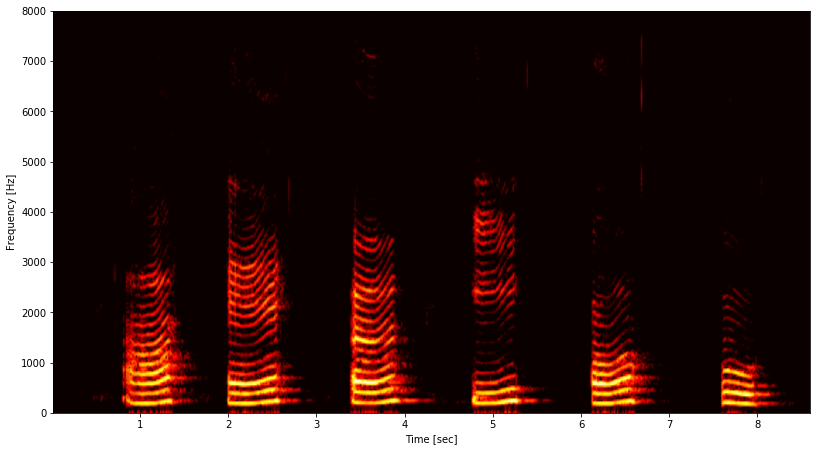

In [41]:
file_paths = "Baghyan.wav"
get_spcgr(file_paths, color_theme, start_t, dur)